# Testing helper functions for correctness

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from signal_processing import *

## kuramoto_order_parameter

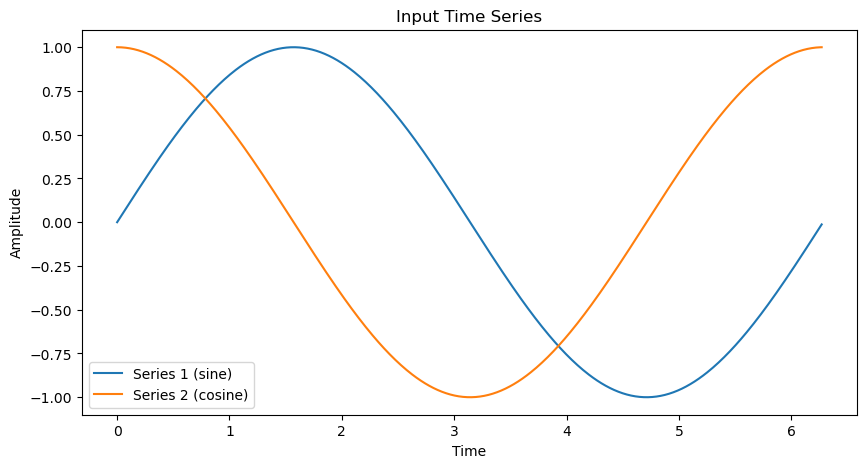

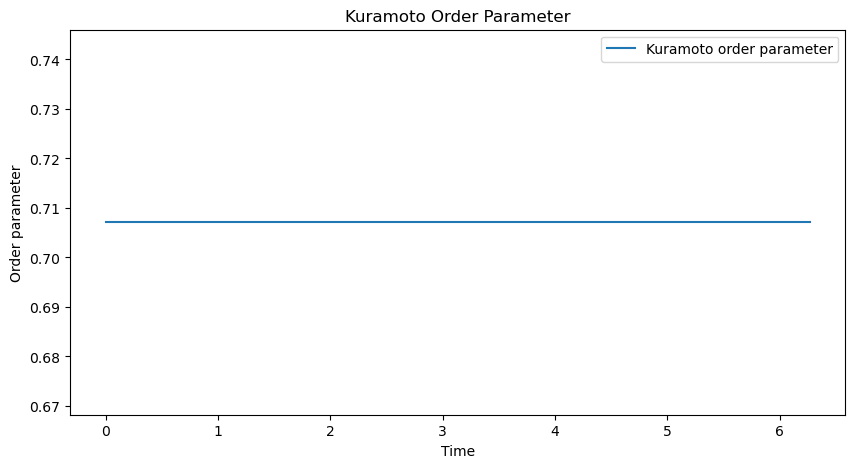

In [6]:
def test_calculate_kuramoto_order_parameter():
    # Create a time series
    t = np.linspace(0, 2 * np.pi, 500, endpoint=False)
    series_1 = np.sin(t)
    series_2 = np.cos(t)
    time_series = np.vstack([series_1, series_2])

    # Apply the function
    result = calculate_kuramoto_order_parameter(time_series)

    # Test the output shape
    assert result.shape == (500,), "Output shape is incorrect"

    # The expected order parameter for a set of phase-shifted oscillators (like sine and cosine) is 1/sqrt(2)
    assert np.allclose(
        result, 1 / np.sqrt(2), atol=1e-2
    ), "Expected order parameter close to 1/sqrt(2) for phase-shifted oscillators"

    plt.figure(figsize=(10, 5))
    plt.plot(t, series_1, label="Series 1 (sine)")
    plt.plot(t, series_2, label="Series 2 (cosine)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Input Time Series")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(t, result, label="Kuramoto order parameter")
    plt.xlabel("Time")
    plt.ylabel("Order parameter")
    plt.title("Kuramoto Order Parameter")
    plt.legend()
    plt.show()


test_calculate_kuramoto_order_parameter()

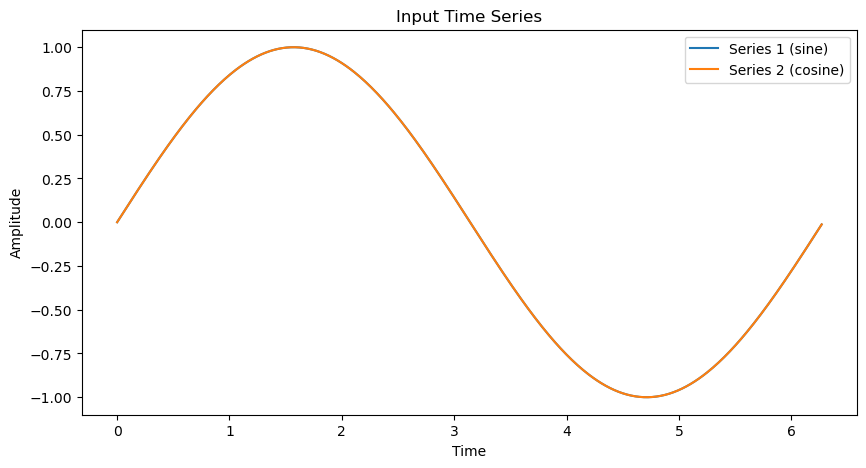

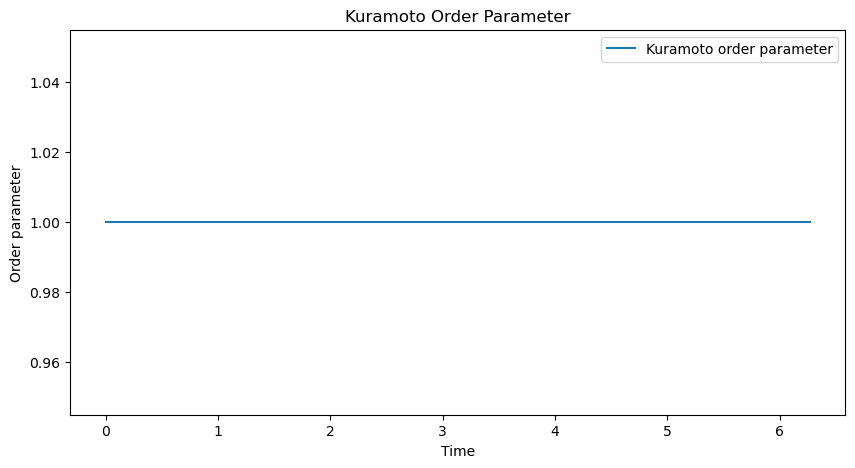

In [8]:
def test_calculate_kuramoto_order_parameter():
    # Create a time series
    t = np.linspace(0, 2 * np.pi, 500, endpoint=False)
    series_1 = np.sin(t)
    series_2 = np.sin(t)
    time_series = np.vstack([series_1, series_2])

    # Apply the function
    result = calculate_kuramoto_order_parameter(time_series)

    # Test the output shape
    assert result.shape == (500,), "Output shape is incorrect"

    # The expected order parameter for a set of phase-shifted oscillators (like sine and cosine) is 1/sqrt(2)
    assert np.allclose(
        result, 1, atol=1e-2
    ), "Expected order parameter close to 1/sqrt(2) for phase-shifted oscillators"

    plt.figure(figsize=(10, 5))
    plt.plot(t, series_1, label="Series 1 (sine)")
    plt.plot(t, series_2, label="Series 2 (cosine)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Input Time Series")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(t, result, label="Kuramoto order parameter")
    plt.xlabel("Time")
    plt.ylabel("Order parameter")
    plt.title("Kuramoto Order Parameter")
    plt.legend()
    plt.show()


test_calculate_kuramoto_order_parameter()

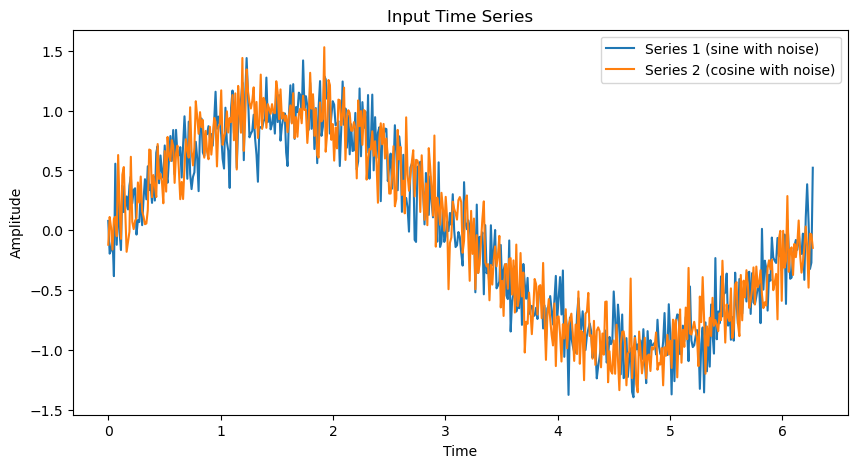

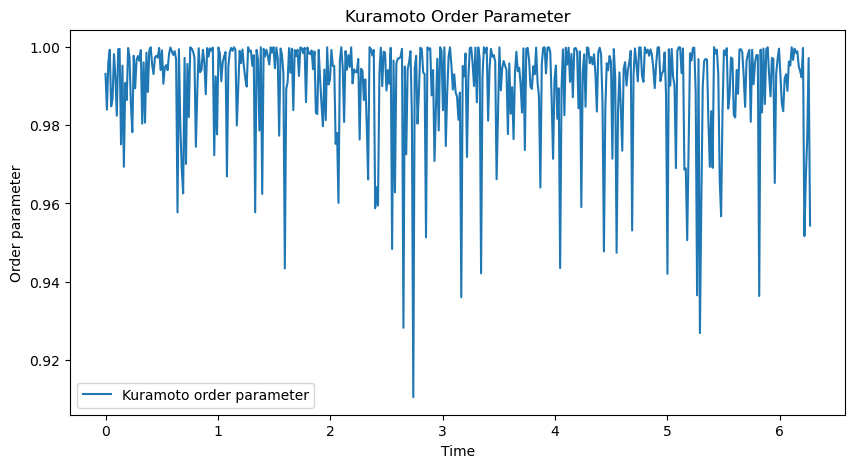

0.990232717256041


In [15]:
def test_calculate_kuramoto_order_parameter_with_noise():
    # Create a time series
    t = np.linspace(0, 2 * np.pi, 500, endpoint=False)
    series_1 = np.sin(t) + np.random.normal(0, 0.2, len(t))  # add white noise
    series_2 = np.sin(t) + np.random.normal(0, 0.2, len(t))  # add white noise
    time_series = np.vstack([series_1, series_2])

    # Apply the function
    result = calculate_kuramoto_order_parameter(time_series)

    # Test the output shape
    assert result.shape == (500,), "Output shape is incorrect"

    plt.figure(figsize=(10, 5))
    plt.plot(t, series_1, label="Series 1 (sine with noise)")
    plt.plot(t, series_2, label="Series 2 (cosine with noise)")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Input Time Series")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(t, result, label="Kuramoto order parameter")
    plt.xlabel("Time")
    plt.ylabel("Order parameter")
    plt.title("Kuramoto Order Parameter")
    plt.legend()
    plt.show()

    print(result.mean())


test_calculate_kuramoto_order_parameter_with_noise()

## filtering

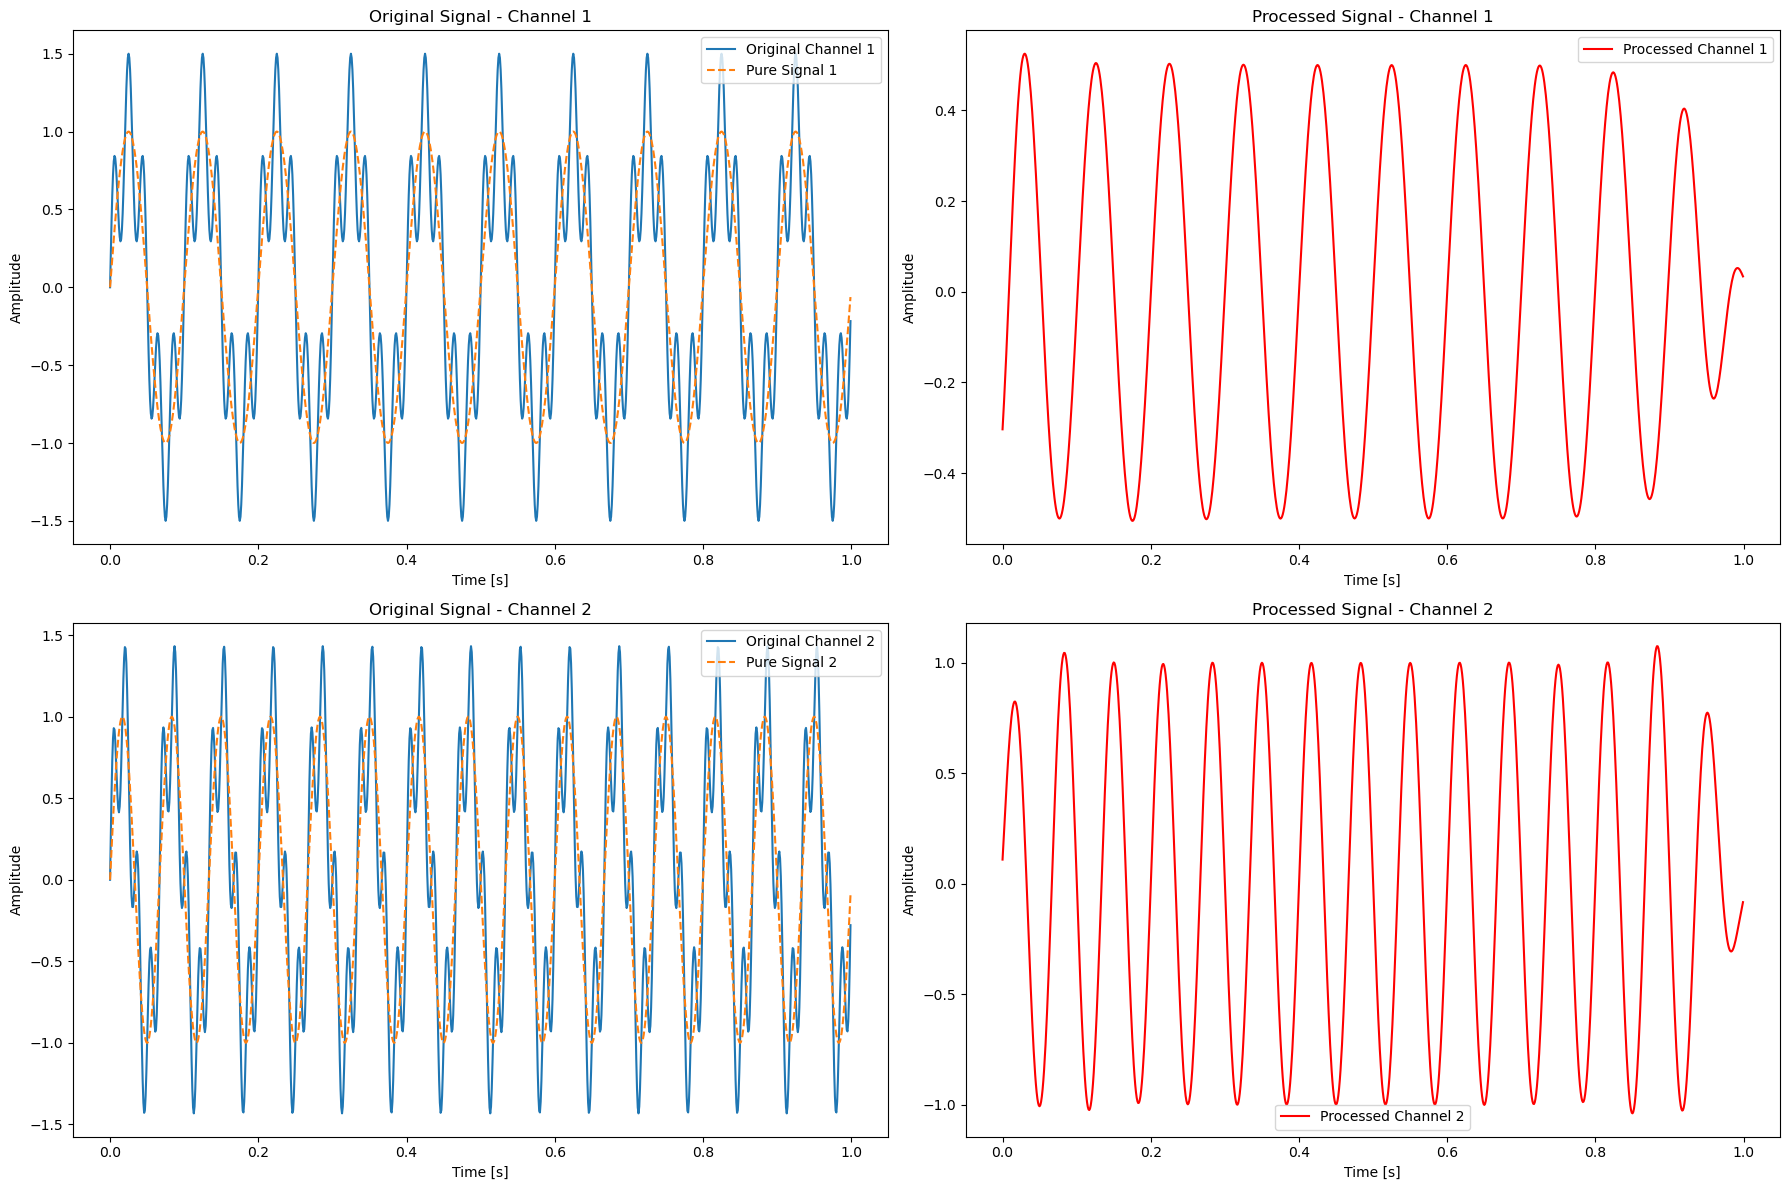

In [2]:
def test_process_data():
    # Define sample rate and time
    sample_rate = 1000.0
    times = np.arange(0, 1.0, 1 / sample_rate)  # 1 second interval

    # Generate a 10Hz and 15Hz sine wave
    freq1, freq2 = 10.0, 15.0  # Frequency of the signals
    signal_wave1 = np.sin(2 * np.pi * freq1 * times)
    signal_wave2 = np.sin(2 * np.pi * freq2 * times)

    # Generate a 50Hz and 60Hz noise
    noise_freq1, noise_freq2 = 50.0, 60.0  # Frequency of the noise
    noise_wave1 = 0.5 * np.sin(2 * np.pi * noise_freq1 * times)
    noise_wave2 = 0.5 * np.sin(2 * np.pi * noise_freq2 * times)

    # Superimpose signals and noise
    data1 = signal_wave1 + noise_wave1
    data2 = signal_wave2 + noise_wave2
    data = np.vstack((data1, data2))  # Stack the two data channels

    # Filter the data
    data_filtered = process_eeg_data(data, sample_rate, band_pass_freq=(10, 20))

    # Plot original and processed data
    plt.figure(figsize=(18, 12))

    plt.subplot(2, 2, 1)
    plt.plot(times, data[0], label="Original Channel 1")
    plt.plot(times, signal_wave1, label="Pure Signal 1", linestyle="dashed")
    plt.title("Original Signal - Channel 1")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(times, data_filtered[0], label="Processed Channel 1", color="r")
    plt.title("Processed Signal - Channel 1")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(times, data[1], label="Original Channel 2")
    plt.plot(times, signal_wave2, label="Pure Signal 2", linestyle="dashed")
    plt.title("Original Signal - Channel 2")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.subplot(2, 2, 4)
    plt.plot(times, data_filtered[1], label="Processed Channel 2", color="r")
    plt.title("Processed Signal - Channel 2")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude")
    plt.legend()

    plt.tight_layout()
    plt.show()


# Call the test function
test_process_data()